In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")


In [17]:
df = pd.read_csv("AdidasSalesdata.csv")

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Month Name'] = df['Invoice Date'].dt.strftime('%b')


In [18]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
 14  Year              9648 n

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
Month               0
Month Name          0
dtype: int64

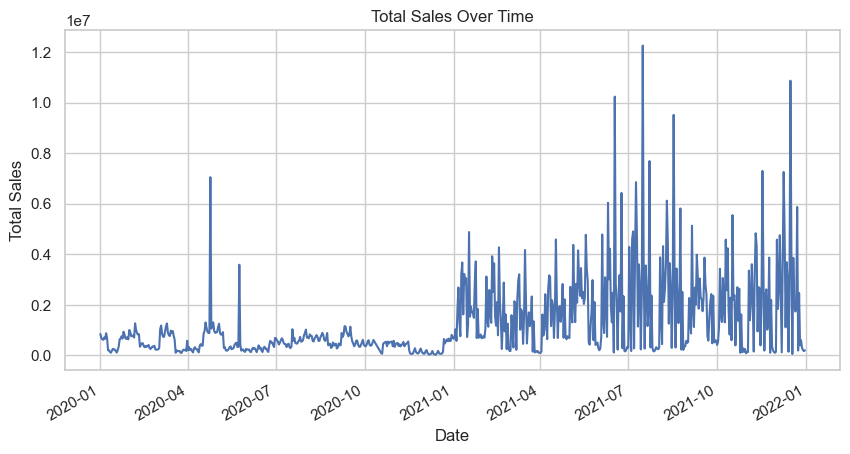

In [19]:
plt.figure(figsize=(10,5))
df.groupby('Invoice Date')['Total Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


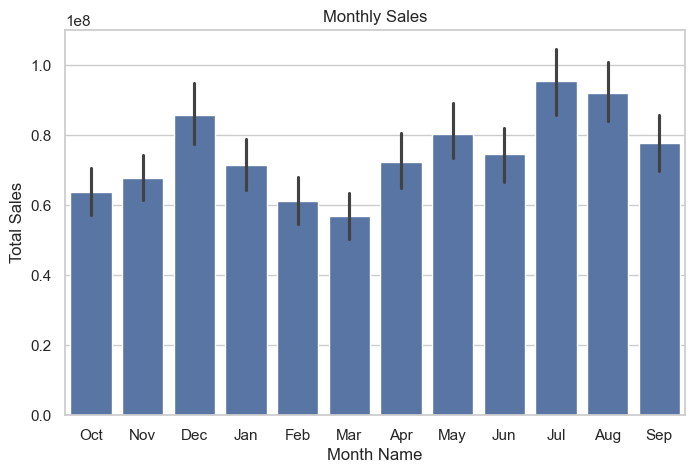

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Month Name', y='Total Sales', estimator=sum)
plt.title('Monthly Sales')
plt.show()


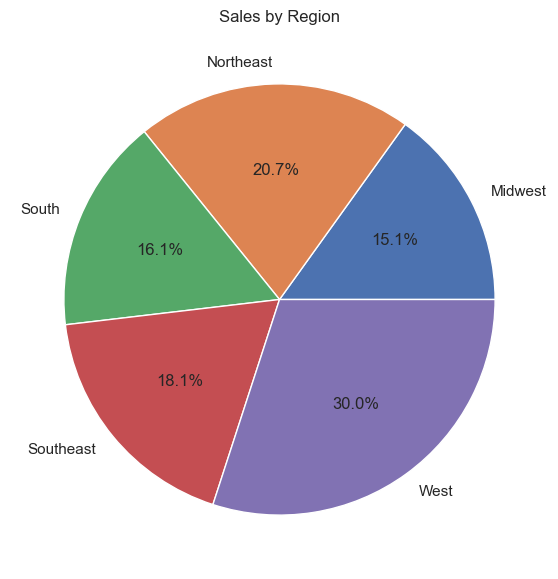

In [21]:
plt.figure(figsize=(7,7))
df.groupby('Region')['Total Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Region')
plt.ylabel('')
plt.show()


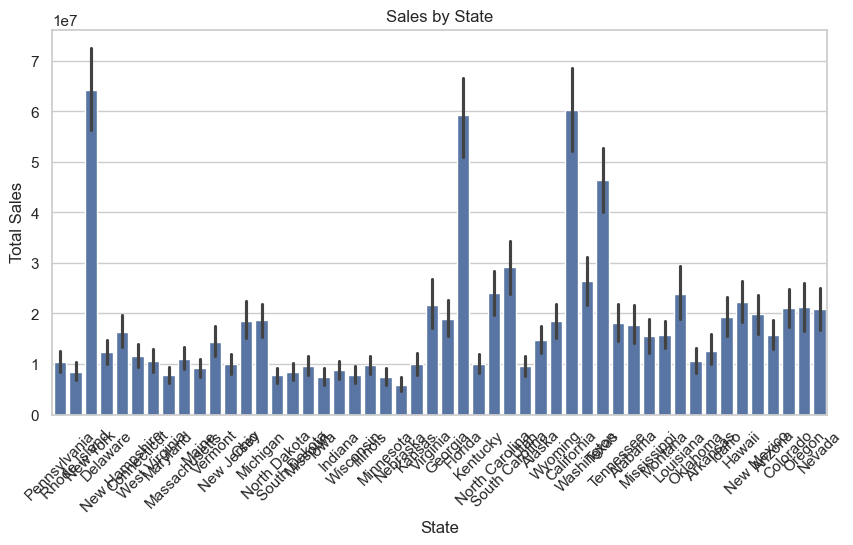

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='State', y='Total Sales', estimator=sum)
plt.xticks(rotation=45)
plt.title('Sales by State')
plt.show()


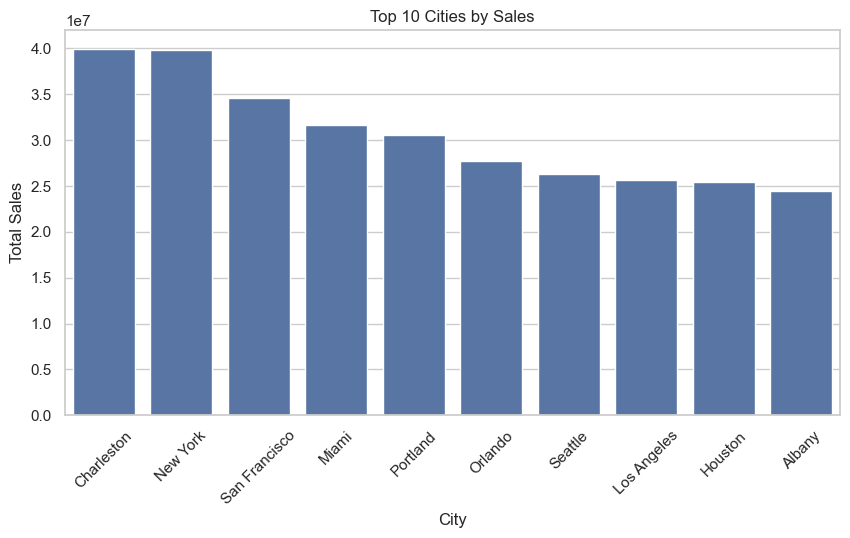

In [23]:
top_cities = df.groupby('City')['Total Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_cities, x='City', y='Total Sales')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Sales')
plt.show()


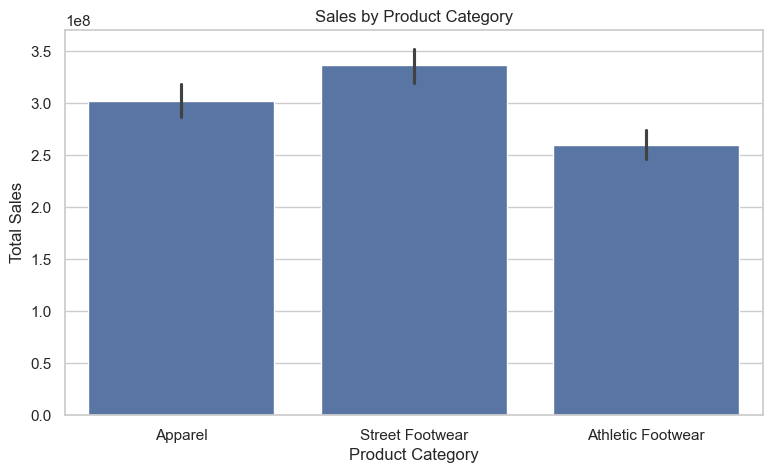

In [24]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='Product Category', y='Total Sales', estimator=sum)
plt.title('Sales by Product Category')
plt.show()


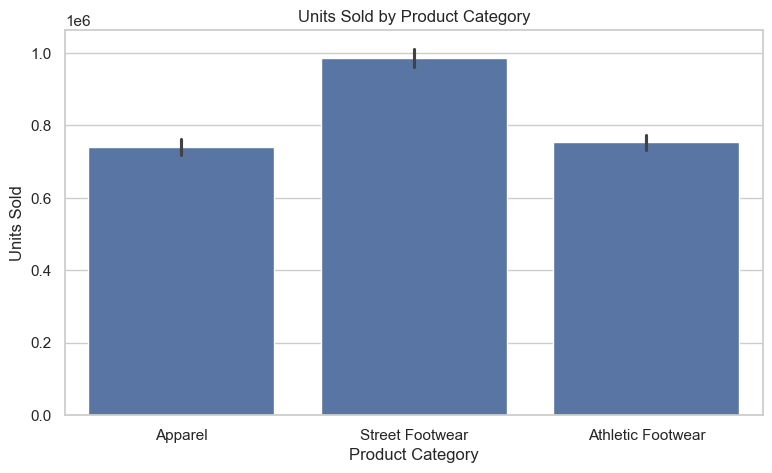

In [25]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='Product Category', y='Units Sold', estimator=sum)
plt.title('Units Sold by Product Category')
plt.show()


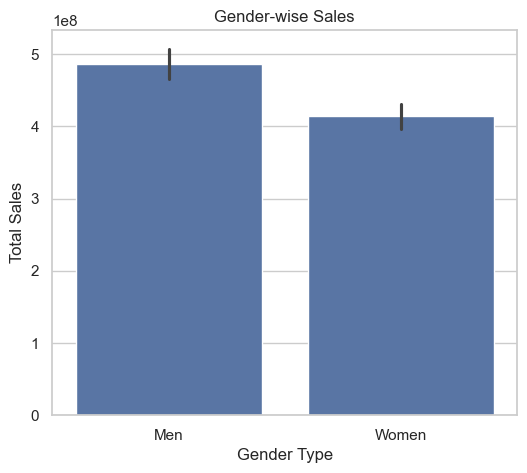

In [26]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Gender Type', y='Total Sales', estimator=sum)
plt.title('Gender-wise Sales')
plt.show()


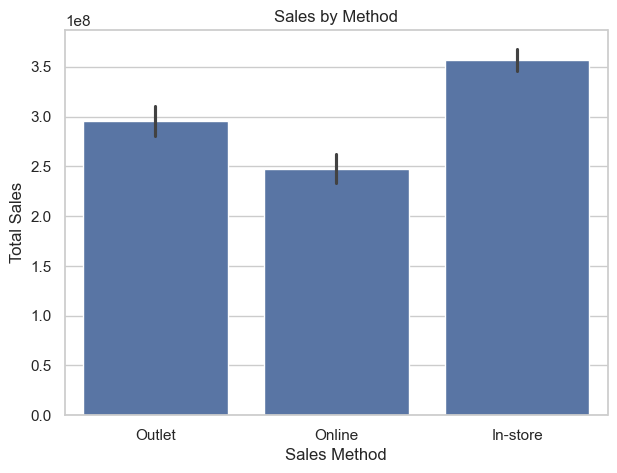

In [27]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Sales Method', y='Total Sales', estimator=sum)
plt.title('Sales by Method')
plt.show()


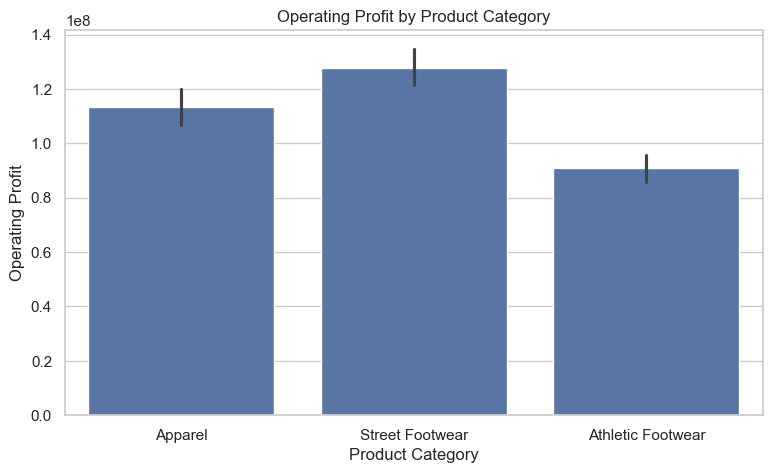

In [28]:
plt.figure(figsize=(9,5))
sns.barplot(data=df, x='Product Category', y='Operating Profit', estimator=sum)
plt.title('Operating Profit by Product Category')
plt.show()


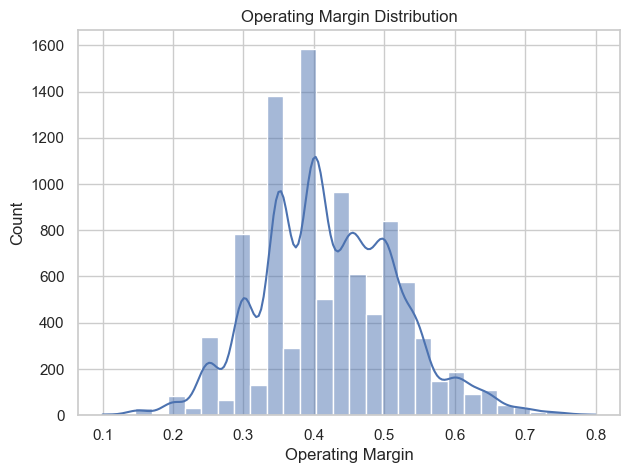

In [29]:
plt.figure(figsize=(7,5))
sns.histplot(df['Operating Margin'], bins=30, kde=True)
plt.title('Operating Margin Distribution')
plt.show()


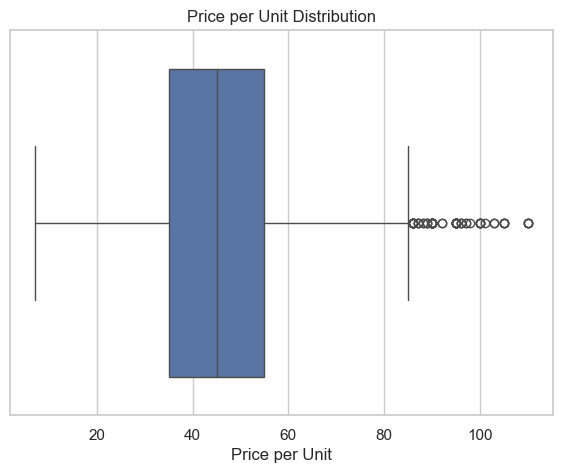

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Price per Unit'])
plt.title('Price per Unit Distribution')
plt.show()


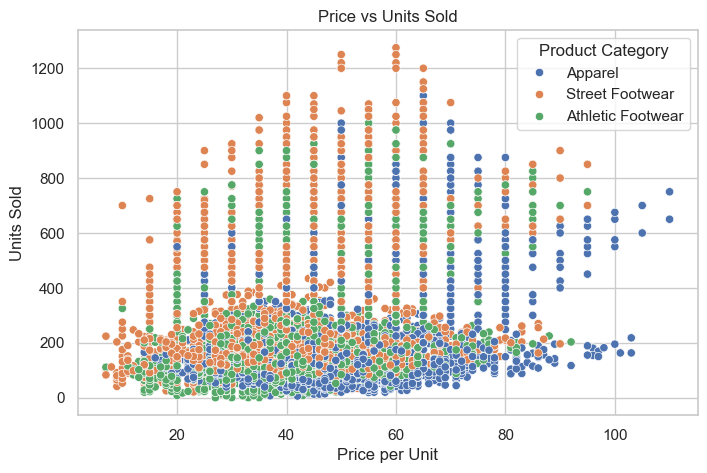

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold',
                hue='Product Category')
plt.title('Price vs Units Sold')
plt.show()


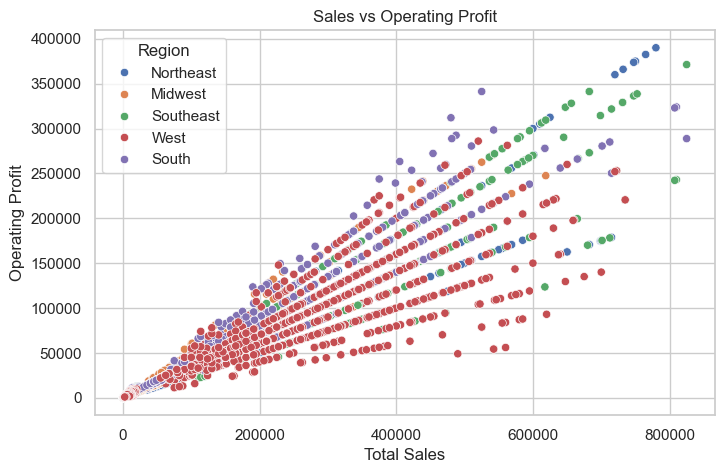

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total Sales', y='Operating Profit',
                hue='Region')
plt.title('Sales vs Operating Profit')
plt.show()


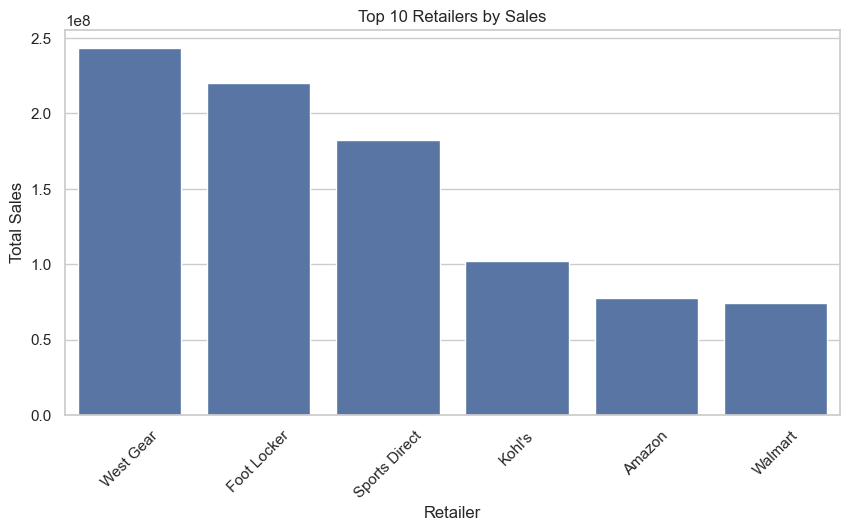

In [33]:
top_retailers = df.groupby('Retailer')['Total Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_retailers, x='Retailer', y='Total Sales')
plt.xticks(rotation=45)
plt.title('Top 10 Retailers by Sales')
plt.show()


In [34]:
print("Total Sales:", df['Total Sales'].sum())
print("Total Profit:", df['Operating Profit'].sum())
print("Average Operating Margin:", df['Operating Margin'].mean())


Total Sales: 899902125.0
Total Profit: 332134761.4499999
Average Operating Margin: 0.42299129353233833
